In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

from pathlib import Path
import seaborn as sns

import os
if Path('.').absolute().parents[1].name == 'ml_drought':
    os.chdir(Path('.').absolute().parents[1])

from scripts.plotting_utils import (
    plot_geog_location, plot_xarray_on_map, 
)

from src.utils import drop_nans_and_flatten

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
# set data and plot dir
if Path('.').absolute().owner() == 'tommylees':
    data_dir = Path('/Volumes/Lees_Extend/data/ecmwf_sowc/data')
    plot_dir = Path('/Users/tommylees/Downloads')
else:
    data_dir = Path('data')
    plot_dir = Path('.')  # ???

data_path = data_dir / "interim" / "chirps_preprocessed" / "chirps_kenya.nc"
analysis_path = data_dir / "analysis" 
all_indices_path = analysis_path / "indices" / "all_indices_kenya.nc"
vhi_path = data_dir / "interim" / "vhi_preprocessed" / "vhi_kenya.nc"
gleam_path = data_dir / "interim" / "gleam_preprocessed" / "gleam_kenya.nc"
era5POS_path = data_dir / "interim" / "era5POS_preprocessed" / "era5POS_kenya.nc"
era5_land_path = data_dir / "interim" / "reanalysis-era5-land_preprocessed" / "reanalysis-era5-land_kenya.nc"
era5_path = data_dir / "interim" / "reanalysis-era5-land_preprocessed" / "reanalysis-era5-land_preprocessed.nc"
esa_cci_lc_path = data_dir / "interim" / "esa_cci_landcover_preprocessed" / "esa_cci_landcover_kenya.nc"
legend = pd.read_csv(esa_cci_lc_path.parents[0] / 'legend.csv')
legend['new_code'] = np.arange(0, (len(legend) * 10), 10)

[d.name for d in (data_dir/'interim').iterdir()]
[d.name for d in (data_dir/'interim').iterdir()]

['chirps_preprocessed',
 'era5_land_interim',
 'era5_land_preprocessed',
 'era5POS_preprocessed',
 'esa_cci_landcover_preprocessed',
 'gcloud',
 'gleam_preprocessed',
 'reanalysis-era5-land_preprocessed',
 's5_interim',
 's5_preprocessed',
 'TEMP',
 'vhi_interim',
 'vhi_preprocessed']

In [4]:
ds = xr.open_dataset(vhi_path)
ds = ds.mean(dim='time')
mask = ds.isnull().VHI.rename('mask')

/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [5]:
from scripts.plotting_utils import plot_seasonality

# CHIRPS

/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


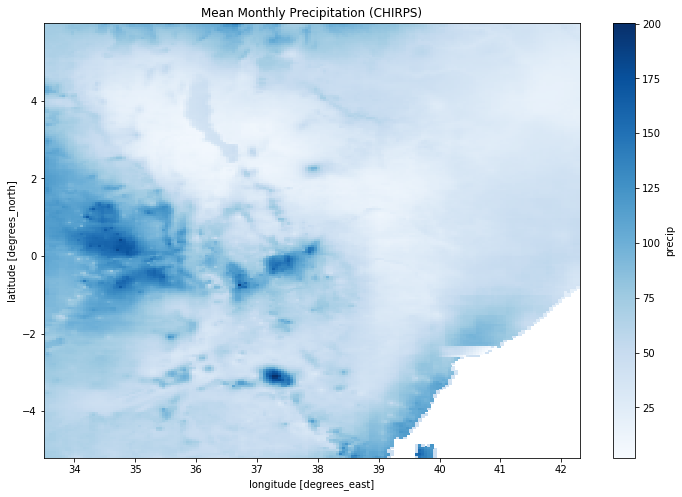

In [68]:
ds = xr.open_dataset(data_path)

fig, ax = plt.subplots(figsize=(12, 8))
ds.mean(dim='time').precip.plot(ax=ax, cmap='Blues')
ax.set_title('Mean Monthly Precipitation (CHIRPS)');

fig.savefig(plot_dir / 'chirps_precip.svg')

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1220f6e10>)

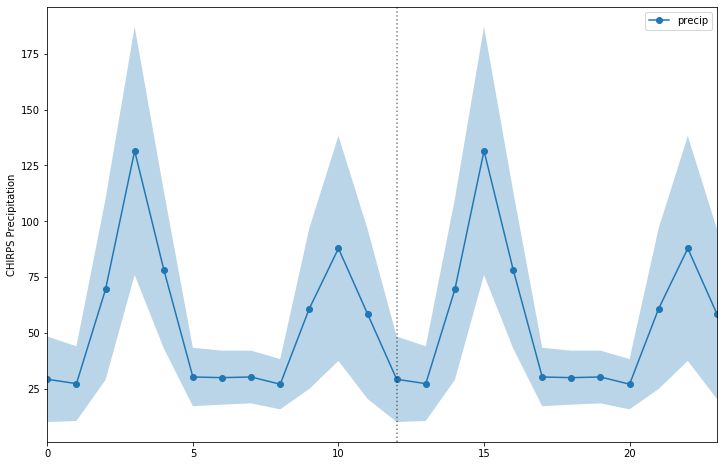

In [71]:
fig, ax = plt.subplots(figsize=(12, 8))
plot_seasonality(ds, ax=ax, ylabel='CHIRPS Precipitation', double_year=True, variance=True)

# GLEAM

In [74]:
ds = xr.open_dataset(gleam_path)
ds

<xarray.Dataset>
Dimensions:  (lat: 224, lon: 176, time: 468)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-31 1980-02-29 ... 2018-12-31
  * lon      (lon) float32 33.524994 33.574997 33.625 ... 42.22499 42.274994
  * lat      (lat) float32 -5.175003 -5.125 -5.075001 ... 5.924999 5.9749985
Data variables:
    E        (time, lat, lon) float64 ...
    SMroot   (time, lat, lon) float64 ...
    SMsurf   (time, lat, lon) float64 ...

/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: the order of the arguments on DataArray.to_dataset has changed; you now need to supply ``name`` as a keyword argument
  
/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: the order of the arguments on DataArray.to_dataset has changed; you now need to supply ``name`` as a keyword argument
  
/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: the order of the arguments on DataArray.to_dataset has changed; you now need to supply 

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1289aa8d0>)

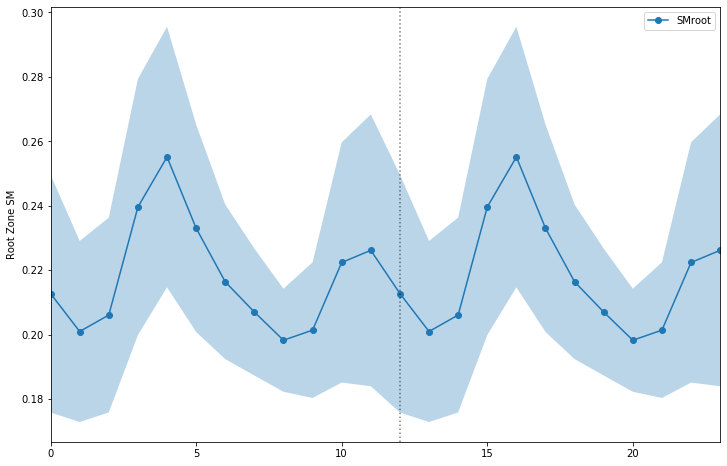

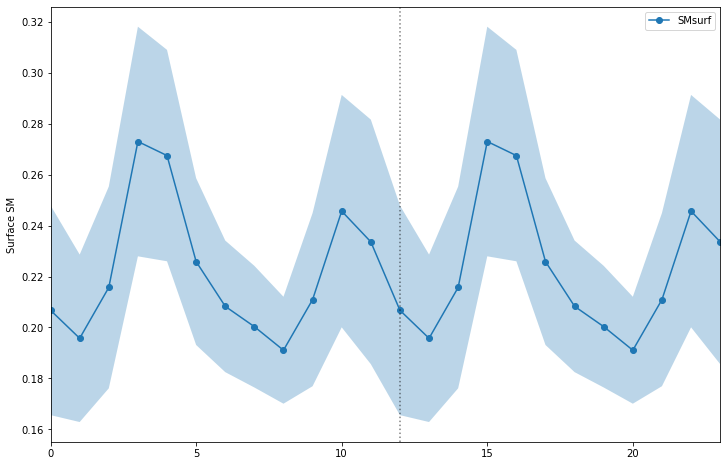

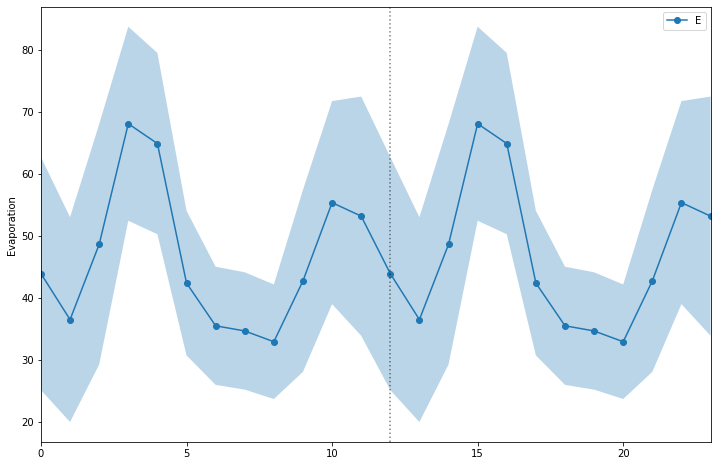

In [80]:
fig, ax = plt.subplots(figsize=(12, 8))
d = ds.SMroot.to_dataset('SMroot')
plot_seasonality(d, ax=ax, ylabel='Root Zone SM', double_year=True, variance=True)

fig, ax = plt.subplots(figsize=(12, 8))
d = ds.SMsurf.to_dataset('SMsurf')
plot_seasonality(d, ax=ax, ylabel='Surface SM', double_year=True, variance=True)

fig, ax = plt.subplots(figsize=(12, 8))
d = ds.E.to_dataset('E')
plot_seasonality(d, ax=ax, ylabel='Evaporation', double_year=True, variance=True)

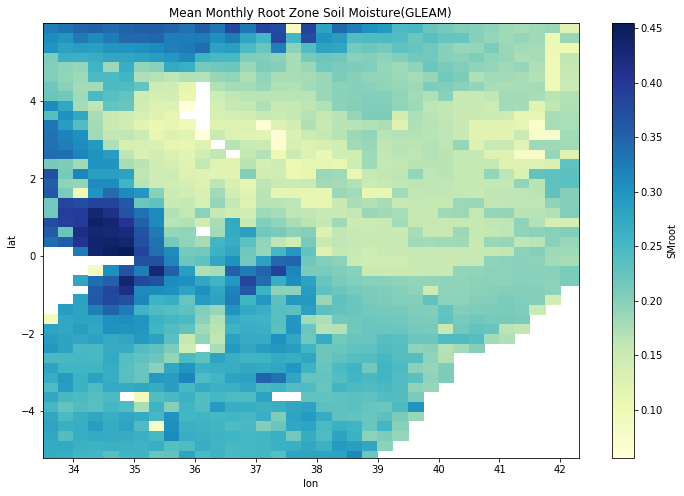

In [73]:
ds = ds.mean(dim='time')

fig, ax = plt.subplots(figsize=(12, 8))
ds.SMroot.plot(ax=ax, cmap='YlGnBu')
ax.set_title('Mean Monthly Root Zone Soil Moisture(GLEAM)');

fig.savefig(plot_dir / 'gleam_root_sm.svg')

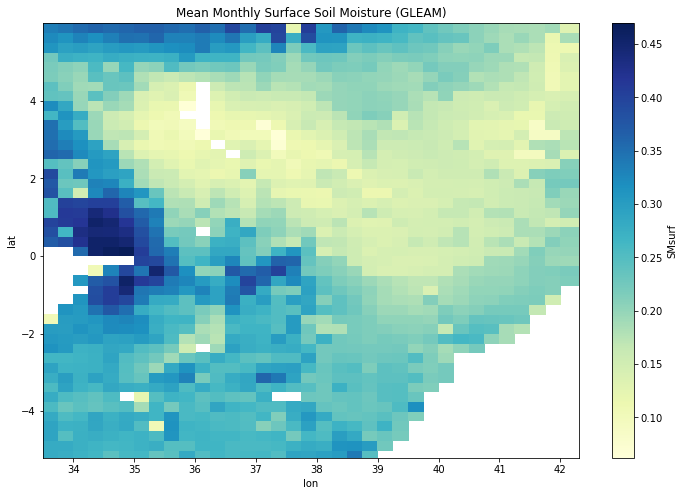

In [66]:
fig, ax = plt.subplots(figsize=(12, 8))
ds.SMsurf.plot(ax=ax, cmap='YlGnBu')
ax.set_title('Mean Monthly Surface Soil Moisture (GLEAM)');

fig.savefig(plot_dir / 'gleam_surf_sm.svg')

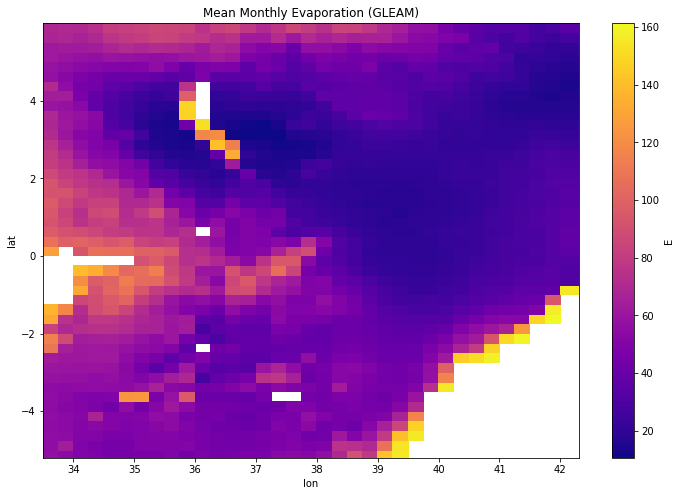

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))
ds.E.plot(ax=ax, cmap='plasma')
ax.set_title('Mean Monthly Evaporation (GLEAM)');

fig.savefig(plot_dir / 'gleam_evap.svg')

# VHI

In [62]:
ds = xr.open_dataset(vhi_path)
d = ds.mean(dim='time')
ds

/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 224, lon: 176)
Coordinates:
  * lon      (lon) float32 33.524994 33.574997 33.625 ... 42.22499 42.274994
  * lat      (lat) float32 -5.175003 -5.125 -5.075001 ... 5.924999 5.9749985
Data variables:
    VHI      (lat, lon) float64 45.96 44.46 45.47 46.98 ... 46.56 46.62 45.21

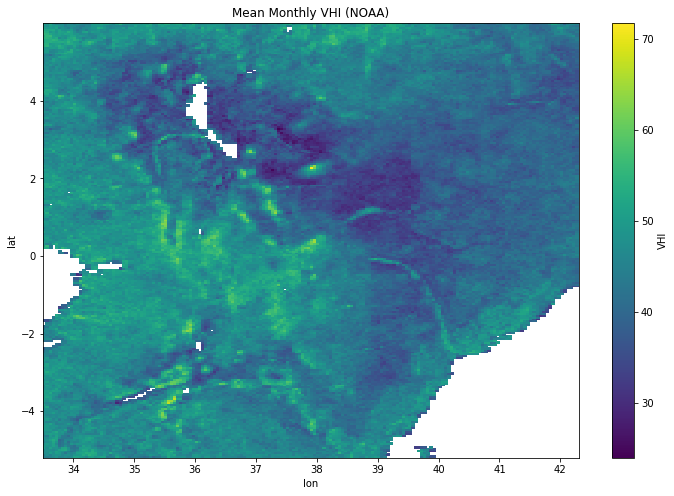

In [63]:
fig, ax = plt.subplots(figsize=(12, 8))
d.VHI.plot(ax=ax, cmap='viridis')
ax.set_title('Mean Monthly VHI (NOAA)');

fig.savefig(plot_dir / 'vhi.svg')

# ERA5

In [60]:
ds = xr.open_dataset(era5POS_path)
d = ds.mean(dim='time').where(~mask)
ds

<xarray.Dataset>
Dimensions:                                    (lat: 224, lon: 176)
Coordinates:
  * lon                                        (lon) float32 33.524994 ... 42.274994
  * lat                                        (lat) float32 -5.175003 ... 5.9749985
Data variables:
    air_temperature_at_2_metres                (lat, lon) float64 296.6 ... 298.3
    air_temperature_at_2_metres_1hour_Maximum  (lat, lon) float64 297.0 ... 298.7
    precipitation_amount_1hour_Accumulation    (lat, lon) float64 8.265e-05 ... 6.588e-05

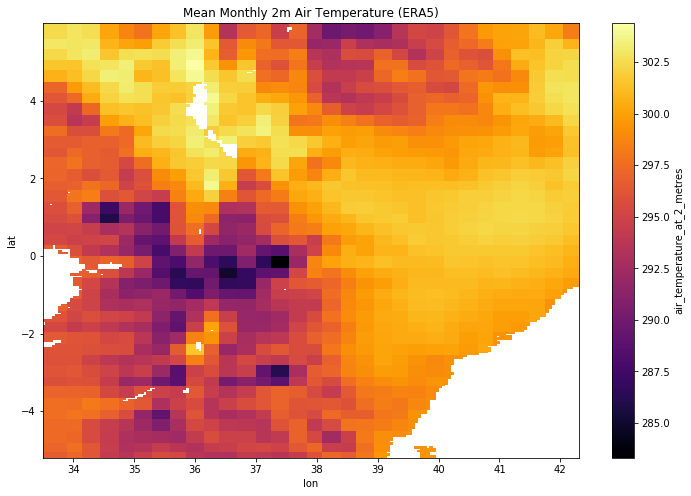

In [61]:
fig, ax = plt.subplots(figsize=(12, 8))
d.air_temperature_at_2_metres.plot(ax=ax, cmap='inferno')
ax.set_title('Mean Monthly 2m Air Temperature (ERA5)');

fig.savefig(plot_dir / 'era5_2m_airtemp.svg')

# ERA5-Land

In [54]:
ds = xr.open_dataset(era5_land_path)
d = ds.mean(dim='time')
# .where(~mask)
ds

/Users/tommylees/miniconda3/envs/crop/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:  (lat: 113, lon: 87)
Coordinates:
  * lon      (lon) float32 33.6 33.7 33.8 33.9 34.0 ... 41.8 41.9 42.0 42.1 42.2
  * lat      (lat) float32 6.0 5.9 5.8 5.7 5.6 5.5 ... -4.8 -4.9 -5.0 -5.1 -5.2
Data variables:
    tp       (lat, lon) float32 0.0012611686 0.0013490068 ... nan nan

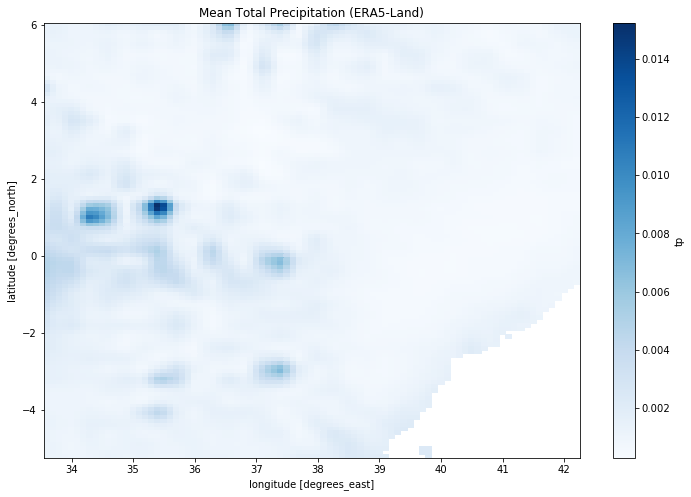

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))
d.tp.plot(ax=ax, cmap='Blues')
ax.set_title('Mean Total Precipitation (ERA5-Land)');

fig.savefig(plot_dir / 'era5_land_tp.svg')

# Landcover

In [90]:
ds = xr.open_dataset(esa_cci_lc_path)

# get the January of every year
ds = ds.sel(time= ds['time.month'] == 1)

ds

<xarray.Dataset>
Dimensions:   (lat: 224, lon: 176, time: 24)
Coordinates:
  * time      (time) datetime64[ns] 1992-01-31 1993-01-31 ... 2015-01-31
  * lon       (lon) float32 33.524994 33.574997 33.625 ... 42.22499 42.274994
  * lat       (lat) float32 -5.175003 -5.125 -5.075001 ... 5.924999 5.9749985
Data variables:
    lc_class  (time, lat, lon) float64 ...

In [101]:
mask_vals = mask.VHI.values

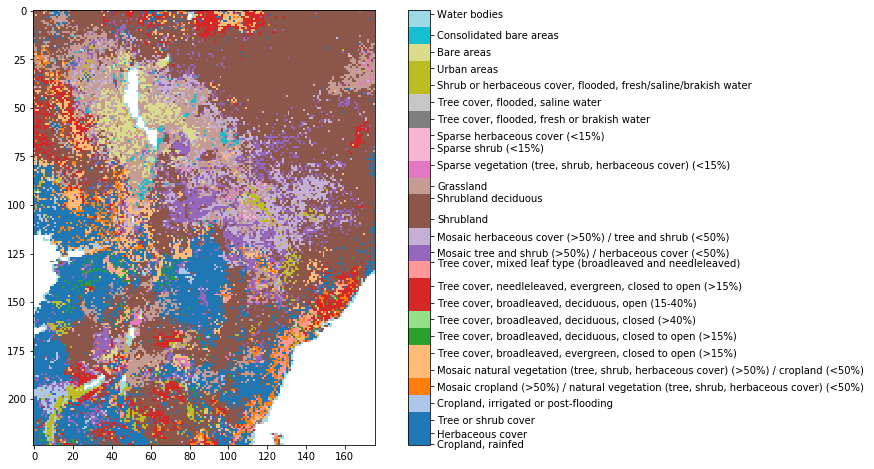

In [190]:
from matplotlib import colors

im = ds.isel(time=0).lc_class.values
im = np.ma.array(im, mask=mask_vals)
im = im[::-1, :]

# DROP the masked value!
valid_vals = list(np.unique(im))[:-1]

# Build a colormap = ListedColormap
c_map = plt.cm.get_cmap('tab20', len(valid_vals))

# get the bounds for the colormaps
# bounds = [-15, 35, 45, 55, 65]
ordered = np.array(sorted(valid_vals))
differences = np.diff(ordered)
bounds = [min(ordered)-1]

for ii, number in enumerate(ordered[1:]):
    bounds.append(number + 5) # + differences[ii]/2)

norm = colors.BoundaryNorm(bounds, len(valid_vals))

# calculate the tick labels
labels = legend[np.isin(legend.new_code, valid_vals)].label
val_lookup = dict(zip(valid_vals, labels))

def formatter_func(x, pos):
    'The two args are the value and tick position'
    val = val_lookup[x]
    return val

formatter = plt.FuncFormatter(formatter_func)

# Build the plot
fig, ax = plt.subplots(figsize=(12, 8))
plt_im = plt.imshow(im, cmap=c_map, norm=norm)

# get the colorbar
c_bar = plt.colorbar(
    plt_im, cmap=c_map, norm=norm, boundaries=bounds , ticks=valid_vals, format=formatter
)
# c_bar.ax.set_xticklabels(legend.label.values)
plt.show()

fig.savefig(plot_dir / 'landcover.svg')

In [147]:
legend.head()

,Unnamed: 0,code,label,label_text,R,G,B,new_code
0,0,0,No data,no data,0,0,0,0
1,1,10,"Cropland, rainfed",cropland rainfed,255,255,100,10
2,2,11,Herbaceous cover,herbaceous cover,255,255,100,20
3,3,12,Tree or shrub cover,tree or shrub cover,255,255,0,30
4,4,20,"Cropland, irrigated or post-flooding",cropland irrigated or postflooding,170,240,240,40


In [191]:
print('ordered')
display(ordered)
print('differences')
display(differences)
print('bounds')
display(np.array(bounds))

ordered


array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.,
       170., 180., 190., 200., 220., 230., 250., 270., 280., 290., 300.,
       310., 320., 330., 340., 360.])

differences


array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 60., 10., 10.,
       10., 20., 10., 20., 20., 10., 10., 10., 10., 10., 10., 10., 20.])

bounds


array([  9.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105., 115.,
       175., 185., 195., 205., 225., 235., 255., 275., 285., 295., 305.,
       315., 325., 335., 345., 365.])

In [192]:
# values, bounds, tick locations, and tick labels
# len(bounds)

27

## How to make the categorical map plot
- [My stack overflow question](https://stackoverflow.com/questions/57249138/plot-categorical-data-in-matplotlib-when-the-values-are-unevenly-spaced/57250575#57250575)
- [geopandas tutorial for plotting in grids](https://towardsdatascience.com/create-categorical-choropleth-with-python-122da5ae6764)
- [landcover stack overflow question](https://gis.stackexchange.com/questions/184996/plotting-classification-map-using-shapefile-in-matplotlib)

### [Geopandas method](https://towardsdatascience.com/create-categorical-choropleth-with-python-122da5ae6764)

In [198]:
# keys = valid_vals
color_range = list(np.linspace(0, 1, len(valid_vals), endpoint=False))
colors_ = [plt.cm.tab20b(x) for x in color_range]
color_dict = dict(zip(valid_vals, colors_))
color_dict['No data'] = 'lightgray'

In [1]:
class_count = len(valid_vals)
ax_list = []
for i in range(class_count+1):
    ax_list.append('ax' + str(i+1))
    
ax_string = ', '.join(ax_list)

fig, (ax_string) = plt.subplots(class_count, 4, figsize=(12, 8))

ax1 = plt.subplot2grid((class_count, 4), (0, 1), rowspan=class_count, colspan=3)
for value in valid_vals:
    # HOW TO PLOT AN IMAGE WITH A SPECIFIC COLOR ? 
    arr = np.ma.masked_where(im == value, im)
    cmap = colors.ListedColormap(color_dict[value])  # color.LinearSegmentedColormap('CustomMap', cdict)
    plot = ax1.imshow(arr.mask, cmap=cmap) #
#     plt.scatter(arr.mask, color=color_dict[value])

ax1.axis('off')

valid_val_counter = 0

for i, label in zip(valid_vals, labels.values): 
    plt.subplot2grid((class_count, 4), (valid_val_counter, 0))
    plt.pie([1], labels=[label], radius=1.1, colors=[color_dict[i]])
    plt.axis('off')

    valid_val_counter += 1

NameError: name 'valid_vals' is not defined